In [6]:
from PIL import Image
import cv2
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms
from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize
from albumentations.pytorch import ToTensor

ModuleNotFoundError: No module named 'torch'

## An example pipeline that uses torchvision

In [2]:
class TorchvisionDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        
        # Read an image with PIL
        image = Image.open(file_path)
        if self.transform:
            image = self.transform(image)
        return image, label


torchvision_transform = transforms.Compose([
    transforms.Resize((256, 256)), 
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )
])


torchvision_dataset = TorchvisionDataset(
    file_paths=['./images/image_1.jpg', './images/image_2.jpg', './images/image_3.jpg'],
    labels=[1, 2, 3],
    transform=torchvision_transform,
)

NameError: name 'Dataset' is not defined

### The same pipeline with albumentations

In [3]:
class AlbumentationsDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        
        # Read an image with OpenCV
        image = cv2.imread(file_path)
        
        # By default OpenCV uses BGR color space for color images,
        # so we need to convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image, label


albumentations_transform = Compose([
    Resize(256, 256), 
    RandomCrop(224, 224),
    HorizontalFlip(),
    Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensor()
])


albumentations_dataset = AlbumentationsDataset(
    file_paths=['./images/image_1.jpg', './images/image_2.jpg', './images/image_3.jpg'],
    labels=[1, 2, 3],
    transform=albumentations_transform,
)

NameError: name 'Dataset' is not defined

### Using albumentations with PIL

You can use PIL instead of OpenCV while working with albumentations, but in this case, you need to convert a PIL image to a numpy array before applying transformations and then convert back the augmented numpy array to a PIL image. 


In [ ]:
class AlbumentationsPilDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]

        image = Image.open(file_path)
        
        if self.transform:
            # Convert PIL image to numpy array
            image_np = np.array(image)
            # Apply transformations
            augmented = self.transform(image=image_np)
            # Convert numpy array to PIL Image
            image = Image.fromarray(augmented['image'])
        return image, label


albumentations_pil_transform = Compose([
    Resize(256, 256), 
    RandomCrop(224, 224),
    HorizontalFlip(),
])


# Note that this dataset will output PIL images and not numpy arrays nor PyTorch tensors
albumentations_pil_dataset = AlbumentationsPilDataset(
    file_paths=['./images/image_1.jpg', './images/image_2.jpg', './images/image_3.jpg'],
    labels=[1, 2, 3],
    transform=albumentations_pil_transform,
)

### albumentations equivalents for torchvision transforms


| torchvision transform 	| albumentations transform 	| albumentations example 	|
|---------------------------------------------------------------------------------------------------------------------------------	|---------------------------------------------------------------------------------------------------------------------------------------------------------	|---------------------------------------------------------------------------------------------	|
| [Compose](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose) 	| [Compose](https://albumentations.readthedocs.io/en/latest/api/core.html#albumentations.core.composition.Compose) 	| ```Compose([Resize(256, 256), RandomCrop(224, 224)])``` 	|
| [CenterCrop](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.CenterCrop) 	| [CenterCrop](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.CenterCrop) 	| ```CenterCrop(256, 256)``` 	|
| [ColorJitter](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ColorJitter) 	| [HueSaturationValue](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.HueSaturationValue) 	| ```HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5)``` 	|
| [Pad](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Pad) 	| [PadIfNeeded](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.PadIfNeeded) 	| ```PadIfNeeded(min_height=512, min_width=512)``` 	|
| [RandomAffine](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomAffine) 	| [ShiftScaleRotate](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.ShiftScaleRotate) 	| ```ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=0.5)``` 	|
| [RandomCrop](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomCrop) 	| [RandomCrop](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.RandomCrop) 	| ```RandomCrop(256, 256)``` 	|
| [RandomGrayscale](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomGrayscale) 	| [ToGray](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.ToGray) 	| ```ToGray(p=0.5)``` 	|
| [RandomHorizontalFlip](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomHorizontalFlip) 	| [HorizontalFlip](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.HorizontalFlip) 	| ```HorizontalFlip(p=0.5)``` 	|
| [RandomRotation](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomRotation) 	| [Rotate](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.Rotate) 	| ```Rotate(limit=45, p=0.5)``` 	|
| [RandomVerticalFlip](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomVerticalFlip) 	| [VerticalFlip](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.VerticalFlip) 	| ```VerticalFlip(p=0.5)``` 	|
| [Resize](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Resize) 	| [Resize](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.Resize) 	| ```Resize(256, 256)``` 	|
| [Normalize](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) 	| [Normalize](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.Normalize) 	| ```Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])``` 	|

In [38]:
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
import os 

In [9]:
def show(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

In [13]:
pwd

'/home/manhduy/Documents/model_DL/envData_Augmentation/data_augmentation/images'

In [12]:
ls

augs_examples/  image_1.jpg  image3.jpg*  image8.jpg*          parrot.jpg
c.jpg           image1.jpg*  image4.jpg*  image9.jpg*          vistas/
dsb2018/        image_2.jpg  image5.jpg*  inria/
image10.jpg*    image2.jpg*  image6.jpg*  kaggle_salt/
image11.jpg*    image_3.jpg  image7.jpg*  original_parrot.jpg


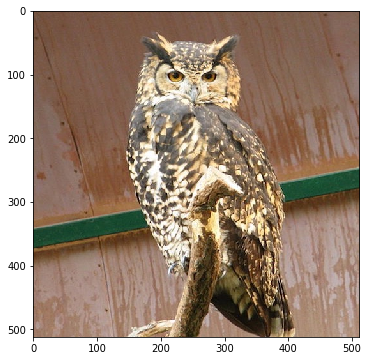

In [20]:
# Let's load an image
image = cv2.imread('/home/manhduy/Documents/model_DL/envData_Augmentation/data_augmentation/images/image_2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image)

### You can use `ReplayCompose` class to debug your augmentation pipeline. Let's apply something to our image

In [21]:
transform = A.ReplayCompose([
    A.Resize(512, 512, always_apply=True),
    A.RandomCrop(200, 200, always_apply=True),
    A.OneOf([
        A.RGBShift(), 
        A.HueSaturationValue()
    ]),
])

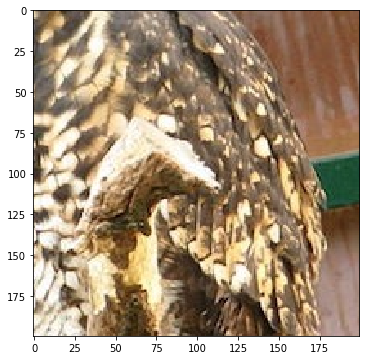

In [23]:
data = transform(image=image)
show(data['image'])

### Some augmentations have randomness inside and imagine that we want to track which random parameters was applied to image. Keys `'replay'` and `'params'` to rescue

In [24]:
data['replay']

{'__class_fullname__': 'albumentations.core.composition.ReplayCompose',
 'applied': True,
 'params': None,
 'transforms': [{'__class_fullname__': 'albumentations.augmentations.transforms.Resize',
   'always_apply': True,
   'applied': True,
   'height': 512,
   'interpolation': 1,
   'p': 1,
   'params': {},
   'width': 512},
  {'__class_fullname__': 'albumentations.augmentations.transforms.RandomCrop',
   'always_apply': True,
   'applied': True,
   'height': 200,
   'p': 1.0,
   'params': {'h_start': 0.5712149151463684, 'w_start': 0.6909291146755929},
   'width': 200},
  {'__class_fullname__': 'albumentations.core.composition.OneOf',
   'applied': False,
   'params': None,
   'transforms': [{'__class_fullname__': 'albumentations.augmentations.transforms.RGBShift',
     'always_apply': False,
     'applied': False,
     'b_shift_limit': (-20, 20),
     'g_shift_limit': (-20, 20),
     'p': 0.5,
     'params': None,
     'r_shift_limit': (-20, 20)},
    {'__class_fullname__': 'albument

### And you can apply exact same augmentations to other images to see these augmentations work on 
images

In [29]:
fps ='/home/manhduy/Documents/model_DL/envData_Augmentation/data_augmentation/images/parrot.jpg'
fps1 ='/home/manhduy/Documents/model_DL/envData_Augmentation/data_augmentation/images/image_3.jpg'


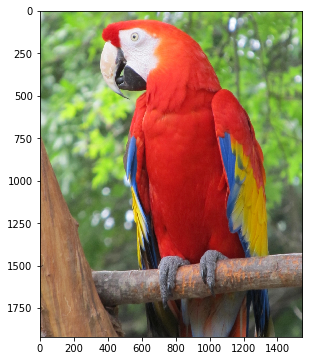

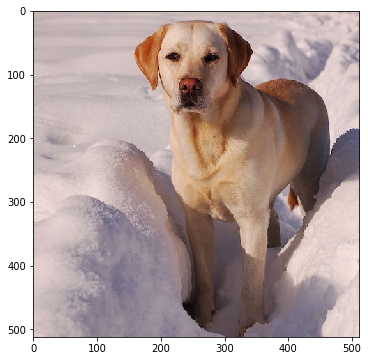

In [33]:
image2 = cv2.imread(fps)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
show(image2)
image3 = cv2.imread(fps1)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
show(image3)
image = image2 

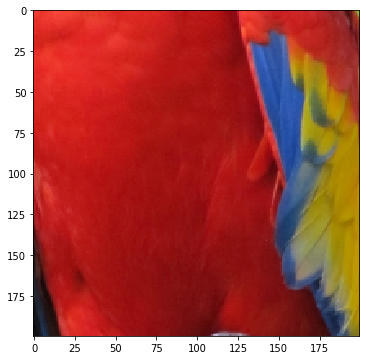

In [31]:
image2_transformed = A.ReplayCompose.replay(data['replay'], image=image2)['image']
show(image2_transformed)

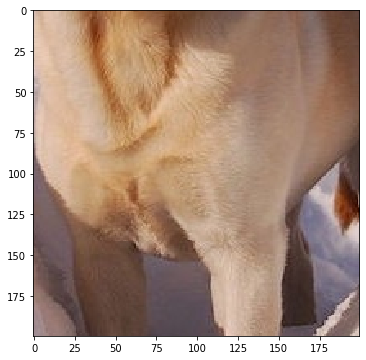

In [32]:
image3_transformed = A.ReplayCompose.replay(data['replay'], image=image3)['image']
show(image3_transformed)

### Using A.save() and A.load() to serialize a transform pipeline to a JSON or YAML file

### We define a transform pipeline

In [34]:
transform = A.Compose([
    A.RandomCrop(768, 768),
    A.OneOf([
        A.RGBShift(), 
        A.HueSaturationValue()
    ]),
])
print(transform)

Compose([
  RandomCrop(always_apply=False, p=1.0, height=768, width=768),
  OneOf([
    RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
    HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
  ], p=0.5),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


### Next, we fix the random seed so we can reproduce the result later, then we pass the image through the pipeline and show an augmented version.

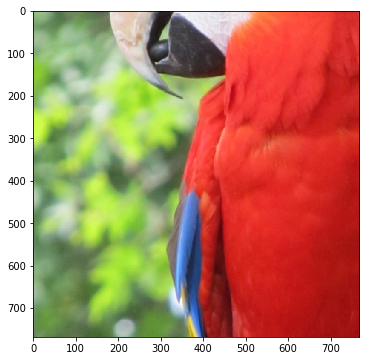

In [35]:
random.seed(42)
augmented_image_1 = transform(image=image)['image']
show(augmented_image_1)

### To serialize an augmentation pipeline to a JSON file, you need to call `A.save` and pass the pipeline and a path to a file.

In [39]:
fps_path = '/home/manhduy/Documents/model_DL/envData_Augmentation/data_augmentation/images/'

In [40]:
A.save(transform, os.path.join(fps_path,'transform.json'))

### To load a serialized pipeline, you need to call `A.load` and pass a path to a file with a serialized version of the pipeline

In [43]:
loaded_transform1 = A.load(os.path.join(fps_path,'transform.json'))
print(loaded_transform1)

Compose([
  RandomCrop(always_apply=False, p=1.0, height=768, width=768),
  OneOf([
    RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
    HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
  ], p=0.5),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


### Next, we use the same seed as before, pass the image through the deserialized pipeline and make sure that the original and the deserialized pipelines produce the same result.

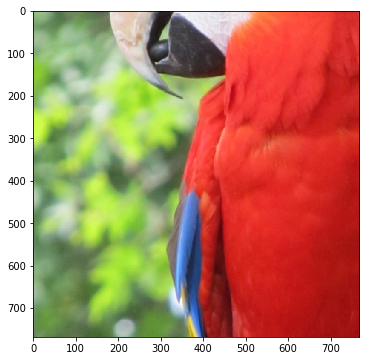

In [44]:
random.seed(42)
augmented_image_2 = loaded_transform1(image=image)['image']
show(augmented_image_2)

In [46]:
assert np.array_equal(augmented_image_1, augmented_image_2)

### You can also serialize pipeline to a YAML file by providing `data_format = 'yaml'`.

In [48]:
path_transform = os.path.join(fps_path,'transform.yml')

In [49]:
A.save(transform, path_transform, data_format='yaml')
loaded_transform = A.load(path_transform, data_format='yaml')

### Using `A.to_dict()` and `A.from_dict()` to serialize a transform pipeline to a Python dictionary.

### If you need more control over a serialized pipeline, e.g., you want to save a serialized version to a database or send it to a server you can use the `A.to_dict` and `A.from_dict` functions. `A.to_dict` returns a Python dictionary that describes a pipeline. The dictionary will contain only primitive data types such as dictionaries, lists, strings, integers, and floats. To construct a pipeline from a dictionary, you need to call `A.from_dict`.

In [50]:
transform_dict = A.to_dict(transform)
loaded_transform = A.from_dict(transform_dict)
print(loaded_transform)

Compose([
  RandomCrop(always_apply=False, p=1.0, height=768, width=768),
  OneOf([
    RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
    HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
  ], p=0.5),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


### Serializing and deserializing Lambda transforms

### Lambda transforms use custom transformation functions provided by a user. For Lambda transforms only name and position in a transform pipeline are saved. When deserialing a pipeline, you need to manually provide all instances of Lambda transform using the `lambda_transforms` argument.

In [51]:
# Define a function that will be used to transform an image
def hflip_image(image, **kwargs):
    return cv2.flip(image, 1)

In [53]:
# Make a Lambda transform. Note that to make the transform serializable, you need to pass the `name` argument.
hflip_transform = A.Lambda(name='hflip_image', image=hflip_image, p=0.5)
print(hflip_transform)

Lambda(name='hflip_image', image=<function hflip_image at 0x7f86ae097048>, mask=<function noop at 0x7f86942ba488>, keypoint=<function noop at 0x7f86942ba488>, bbox=<function noop at 0x7f86942ba488>, always_apply=False, p=0.5)


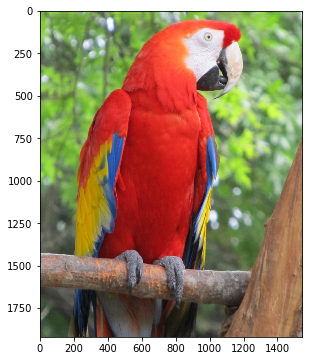

In [54]:
# Apply the transform to an image
random.seed(1)
flipped_image_1 = hflip_transform(image=image)['image']
show(flipped_image_1)

In [55]:
### To serialize a Lambda transform you use the same functions `A.to_dict` and `A.save`

In [56]:
loaded_transform = A.from_dict(transform_dict, lambda_transforms={'hflip_image': hflip_transform})
print(loaded_transform)

Compose([
  RandomCrop(always_apply=False, p=1.0, height=768, width=768),
  OneOf([
    RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
    HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
  ], p=0.5),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


In [57]:
### Next, we test that deserialized transform produces the same output

In [64]:
random.seed(1)
flipped_image_2 = loaded_transform(image=image)['image'] 

assert np.array_equal(flipped_image_1, flipped_image_2)

### For `A.load` you also need to provide the `lambda_transforms` argument

In [65]:
A.save(hflip_transform, '/tmp/hflip_transform.json')
loaded_transform = A.load('/tmp/hflip_transform.json', lambda_transforms={'hflip_image': hflip_transform})
print(loaded_transform)

Lambda(name='hflip_image', image=<function hflip_image at 0x7f86ae097048>, mask=<function noop at 0x7f86942ba488>, keypoint=<function noop at 0x7f86942ba488>, bbox=<function noop at 0x7f86942ba488>, always_apply=False, p=0.5)
